In [810]:
import matplotlib.pyplot as plt
import scipy
import sympy
import numpy as np
import control 
import os
import array_to_latex as a2l
from LatexGapFiller import LatexGapFiller, TextSheet
from ControlTheoryToolbox import System, CToolbox
import cvxpy

# Task 1

In [811]:
def modeling(A, B, K, time_end = 3):
    ss = control.ss((A + B @ K), B*0, A * 0, B * 0)

    time = np.linspace(0, time_end, 1000)
    output = control.forced_response(ss, X0=[1, 1, 1, 1], T=time).states

    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4,hspace=0.4)
    colors = ['blue', 'r', 'green', 'orange']
    for i in range(4):
        axs[0].plot(time, output[i], linewidth=3, label=f"x_{i}(t)", color=colors[-i])
        # axs[i//2, i % 2].scatter(t[-1], x1[i], color='r', linewidth=4, label='goal')
    axs[0].set_title(f'x(t)', fontsize=12)
    axs[0].set_xlabel(f"t, [c]", fontsize=12)
    axs[0].grid(True)
    axs[0].legend()
    
    axs[1].plot(time, (K @ output).reshape(-1), linewidth=3, label=f"u(t)", color='r')
    axs[1].set_title(f'u(t)', fontsize=12)
    axs[1].set_xlabel(f"t, [c]", fontsize=12)
    axs[1].grid(True)
    axs[1].legend()

    # axs[1, 1].plot(t, np.array(U).reshape(-1), linewidth=4)
    # axs[1, 1].set_title(f'u = u(t)', fontsize=12)
    # axs[1, 1].set_xlabel(f"t, [c]", fontsize=12)
    # axs[1, 1].grid(True)

In [812]:
gap_filler = LatexGapFiller()
A = np.array([
    [-5, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 2, 6],
    [0, 0, -6, 2],
])
B = np.array([
    [0],
    [1],
    [0],
    [3]
])


In [813]:
CToolbox.check_eigenvalues_controllable(A, B)

array([ True,  True, False,  True])

In [814]:
np.linalg.eig(A)[0]

array([ 2.+6.j,  2.-6.j, -5.+0.j,  0.+0.j])

In [815]:
desired_eigvalues = [-5, -5, -5, -5]
G = np.diag(desired_eigvalues)
G[0, 1] = 1
G[1, 2] = 1
G[2, 3] = 1
Y = np.array([[0, 1, 0, 0]])

In [816]:
CToolbox.check_system_observable(G, Y)

False

In [817]:
P = scipy.linalg.solve_sylvester(A, -G, B@Y)
K = -Y @ np.linalg.pinv(P)

In [818]:
np.linalg.eig(A+B@K)[0]

array([-5.+5.73e-05j, -5.-5.73e-05j, -5.+0.00e+00j, -5.+0.00e+00j])

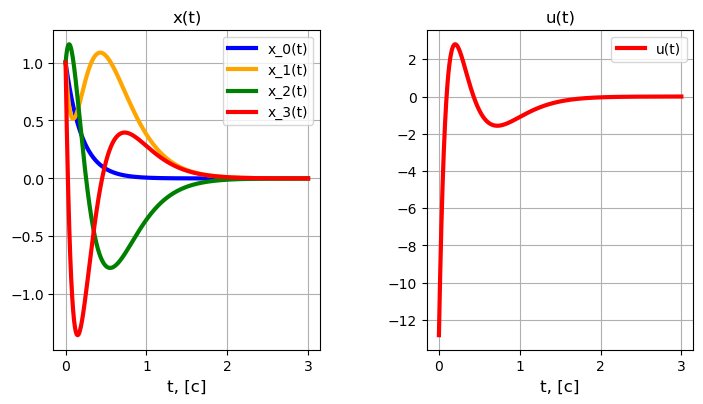

In [819]:
modeling(A, B, K)

Рассмотрим систему:

$$
    \dot{x} = Ax + Bu
$$
где согласно варианту: $A = {A}$, $B = {B}$

Найдем собственные числа матрицы $A$, получим: $\lambda = {lambdas}$. Проверив их на управляемость через матрицу Хаутуса получаем, что собственные числа $ {controllable_eigen_values}$ управляемы, а собственные числа $ {not_controllable_eigen_values}$ неуправляемы, но заметим, что эти числа явялются вещественными и отрицательными, а значит этим собственным числам и так соответсвуют устойчивые моды, а значит можно сделать вывод о том, что система стабилизируема, но не управляема.

Для желаемого спектра {desired_eigen_values} найдем соответствующую матрицу $K$. Для этого сначала составим матрицу $\Gamma$, с желаемым спектром, получим: $\Gamma = {G}$. К этой матрице $\Gamma$ подберем матрицу $Y$, такую, чтобы для пары $(Y, \Gamma)$ неуправляемые собственные числа матрицы $A$ были ненаблюдаемы. 
Возьмём $Y = {Y}$. Теперь решим уравнение Сильвестора вида $A P - P \Gamma = B Y$ и найдем $P$, получим $P = {P}$. Возьмём обратную от матрицы $P$, и найдем матрицу $K$ по формуле: $K = -Y P^{-1}$.
Получим $K = {K}$. 

Проведем моделирование и получим следующие графики:

\begin{figure}
    \centerline{\includegraphics[width=\linewidth]{ {image_name}}}
    \caption{Моделирование системы по заданию {id}}
    \label{11}
\end{figure}


In [820]:
desired_eigvalues = [-5, -50, -500, -500]
G = np.diag(desired_eigvalues)
G[2, 3] = 1
Y = np.array([[0, 1, 1, 1]])
G, Y

(array([[  -5,    0,    0,    0],
        [   0,  -50,    0,    0],
        [   0,    0, -500,    1],
        [   0,    0,    0, -500]]),
 array([[0, 1, 1, 1]]))

In [821]:
print(a2l.to_ltx(G, frmt = '{:2}', arraytype = 'bmatrix', print_out=False))

\begin{bmatrix}
 -5  &   0  &   0  &   0 \\
   0  & -50  &   0  &   0 \\
   0  &   0  & -500  &   1 \\
   0  &   0  &   0  & -500 
\end{bmatrix}


In [822]:
P = scipy.linalg.solve_sylvester(A, -G, B@Y)
K = -Y @ np.linalg.pinv(P)
print(a2l.to_ltx(P, frmt = '{:2.2f}', arraytype = 'bmatrix', print_out=False))
print(a2l.to_ltx(K, frmt = '{:2.2f}', arraytype = 'bmatrix', print_out=False))

\begin{bmatrix}
  0.00 &  0.00 &  0.00 &  0.00\\
  0.00 &  0.02 &  0.00 &  0.00\\
  0.00 & -0.01 & -0.00 & -0.00\\
  0.00 &  0.06 &  0.01 &  0.01
\end{bmatrix}
\begin{bmatrix}
  0.00 & -312500.00 & -51503.78 &  103815.33
\end{bmatrix}


In [823]:
np.linalg.eig(A+B@K)[0]

array([-500., -500.,  -50.,   -5.])

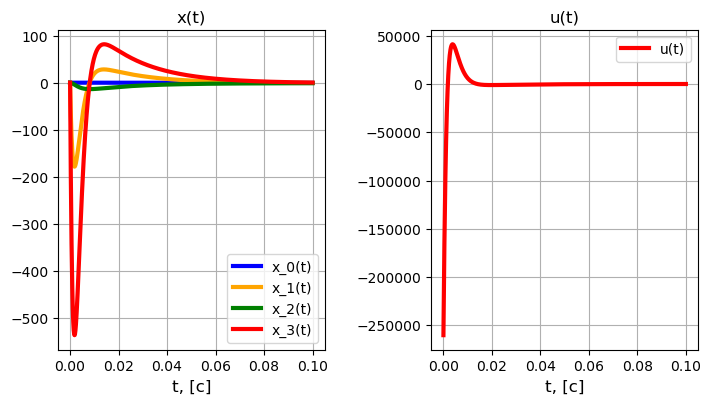

In [824]:
modeling(A, B, K, time_end=0.1)


Для желаемого спектра {desired_eigen_values} найдем соответствующую матрицу $K$. Для этого сначала составим матрицу $\Gamma$, с желаемым спектром, получим: $\Gamma = {G}$. К этой матрице $\Gamma$ подберем матрицу $Y$, такую, чтобы для пары $(Y, \Gamma)$ неуправляемые собственные числа матрицы $A$ были ненаблюдаемы. 
Возьмём $Y = {Y}$. Теперь решим уравнение Сильвестора вида $A P - P \Gamma = B Y$ и найдем $P$, получим $P = {P}$. Возьмём обратную от матрицы $P$, и найдем матрицу $K$ по формуле: $K = -Y P^{-1}$.
Получим $K = {K}$. 

Проведем моделирование и получим следующие графики:

\begin{figure}
    \centerline{\includegraphics[width=\linewidth]{ {image_name}}}
    \caption{Моделирование системы по заданию {id}}
    \label{11}
\end{figure}


In [825]:
def task1_get_G(specs):
    new_g = np.diag(specs)
    for i in range(1, new_g.shape[0]):
        if new_g[i, i] == new_g[i-1, i-1]:
            new_g[i-1, i] = 1
    if specs[2].imag != 0:
        new_g[2, 2] = specs[2].real
        new_g[3, 3] = specs[2].real
        new_g[2, 3] = specs[2].imag
        new_g[3, 2] = -specs[2].imag
    return new_g

In [826]:
def task1_get_K(A, B, G, Y):
    P= cvxpy.Variable(A.shape)
    objective = cvxpy.Minimize(cvxpy.sum_squares(A @ P - P @ G - B @ Y))
    prob = cvxpy.Problem(objective)
    print(f'Optimization error: {prob.solve()}, rankP = {np.linalg.matrix_rank(P.value)}')
    return - Y @ np.linalg.pinv(P.value), P.value

In [827]:
desired_eigvalues = [-5, -10, 6j, -6j]
G = task1_get_G(desired_eigvalues)
# G[3, 2] = 6
# G[2, 3] = -6
# G[2, 2] = 0
# G[3, 3] = 0
Y = np.array([[0, 1, 1, 1]])
G, Y

(array([[ -5.+0.j,   0.+0.j,   0.+0.j,   0.+0.j],
        [  0.+0.j, -10.+0.j,   0.+0.j,   0.+0.j],
        [  0.+0.j,   0.+0.j,   0.+0.j,   6.+0.j],
        [  0.+0.j,   0.+0.j,  -6.+0.j,   0.+0.j]]),
 array([[0, 1, 1, 1]]))

In [828]:
# P, J = sympy.Matrix(G).jordan_form()
# G = np.array(J, dtype=np.csingle)
# G

In [829]:
print(np.linalg.eig(G)[0])

[  0.+6.j   0.-6.j  -5.+0.j -10.+0.j]


In [830]:
CToolbox.check_eigenvalues_observable(G, Y)

array([ True,  True, False,  True])

In [831]:
P = scipy.linalg.solve_sylvester(A, -G, B@Y)
K = -Y @ np.linalg.pinv(P)

In [832]:
P = P.real

In [833]:
K_new, P_new =task1_get_K(A, B, G, Y)
P_new

Optimization error: 3.1554436208840472e-30, rankP = 3


array([[-0.  , -0.  , -0.  , -0.  ],
       [-0.  ,  0.1 , -0.17,  0.17],
       [-0.  , -0.1 ,  0.61, -0.85],
       [-0.  ,  0.2 ,  0.65,  0.89]])

In [834]:
P, P_new

(array([[ 0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.1 , -0.17,  0.17],
        [ 0.  , -0.12,  0.63,  0.09],
        [ 0.  ,  0.25, -0.3 ,  0.6 ]]),
 array([[-0.  , -0.  , -0.  , -0.  ],
        [-0.  ,  0.1 , -0.17,  0.17],
        [-0.  , -0.1 ,  0.61, -0.85],
        [-0.  ,  0.2 ,  0.65,  0.89]]))

In [835]:
np.set_printoptions(precision=2)
(A@P-P@G).real, B@Y

(array([[ 0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00],
        [ 0.00e+00,  1.00e+00,  1.00e+00,  1.00e+00],
        [ 0.00e+00,  0.00e+00,  0.00e+00,  1.33e-15],
        [ 0.00e+00,  3.75e+00, -7.80e-01,  2.46e+00]]),
 array([[0, 0, 0, 0],
        [0, 1, 1, 1],
        [0, 0, 0, 0],
        [0, 3, 3, 3]]))

In [836]:
np.set_printoptions(precision=2)
(A@P_new-P_new@G).real, B@Y

(array([[0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
        [0.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
        [0.00e+00, 0.00e+00, 0.00e+00, 8.88e-16],
        [0.00e+00, 3.00e+00, 3.00e+00, 3.00e+00]]),
 array([[0, 0, 0, 0],
        [0, 1, 1, 1],
        [0, 0, 0, 0],
        [0, 3, 3, 3]]))

In [837]:
K.real, K_new

(array([[  0.  , -90.  , -13.33,  25.33]]),
 array([[ 0.  , -9.  , -2.33, -1.67]]))

In [838]:
G = np.array(G, dtype=int)
print(a2l.to_ltx(G, frmt = '{:2}', arraytype = 'bmatrix', print_out=False))

\begin{bmatrix}
 -5  &   0  &   0  &   0 \\
   0  & -10  &   0  &   0 \\
   0  &   0  &   0  &   6 \\
   0  &   0  & -6  &   0 
\end{bmatrix}


/tmp/ipykernel_6070/1162410464.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  G = np.array(G, dtype=int)


In [839]:
print(a2l.to_ltx(P_new, frmt = '{:2.2f}', arraytype = 'bmatrix', print_out=False))
print(a2l.to_ltx(K_new, frmt = '{:2.2f}', arraytype = 'bmatrix', print_out=False))

\begin{bmatrix}
  -0.00 &  -0.00 &  -0.00 &  -0.00\\
  -0.00 &  0.10 & -0.17 &  0.17\\
  -0.00 & -0.10 &  0.61 & -0.85\\
  -0.00 &  0.20 &  0.65 &  0.89
\end{bmatrix}
\begin{bmatrix}
  0.00 & -9.00 & -2.33 & -1.67
\end{bmatrix}


In [840]:
np.linalg.eig(A+B@K_new)[0]

array([ 2.89e-15+6.j,  2.89e-15-6.j, -1.00e+01+0.j, -5.00e+00+0.j])

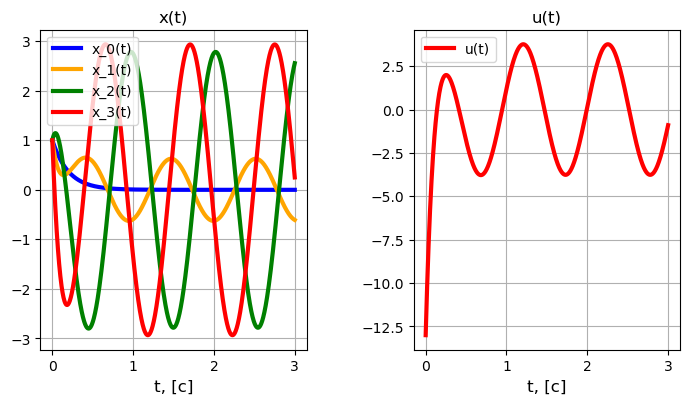

In [841]:
modeling(A, B, K_new)

In [842]:
def task2_get_L(A, C, G, Y):
    Q = cvxpy.Variable(A.shape)
    objective = cvxpy.Minimize(cvxpy.sum_squares(G @ Q - Q @ A - Y @ C))
    prob = cvxpy.Problem(objective)
    print(f'Optimization error: {prob.solve()}, rankP = {np.linalg.matrix_rank(Q.value)}')
    return np.linalg.pinv(Q.value) @ Y

In [843]:
desired_eigvalues = [-5, -10, -2+6j, -2-6j]
G = task1_get_G(desired_eigvalues)
# G[3, 2] = 6
# G[2, 3] = -6
# G[2, 2] = 0
# G[3, 3] = 0
Y = np.array([[0, 1, 1, 1]])
G, Y

(array([[ -5.+0.j,   0.+0.j,   0.+0.j,   0.+0.j],
        [  0.+0.j, -10.+0.j,   0.+0.j,   0.+0.j],
        [  0.+0.j,   0.+0.j,  -2.+0.j,   6.+0.j],
        [  0.+0.j,   0.+0.j,  -6.+0.j,  -2.+0.j]]),
 array([[0, 1, 1, 1]]))

In [844]:
print(np.linalg.eig(G)[0])

[ -2.+6.j  -2.-6.j  -5.+0.j -10.+0.j]


In [845]:
P = scipy.linalg.solve_sylvester(A, -G, B@Y)
K, P = task1_get_K(A, B, G, Y)

Optimization error: 7.888609052210118e-31, rankP = 3


In [846]:
np.linalg.eig(A+B@K)[0]

array([ -2.+6.j,  -2.-6.j, -10.+0.j,  -5.+0.j])

In [847]:
np.linalg.eig(A+B@K_new)[0]

array([ 2.89e-15+6.j,  2.89e-15-6.j, -1.00e+01+0.j, -5.00e+00+0.j])

In [848]:
G = np.array(G, dtype=int)
print(a2l.to_ltx(G, frmt = '{:2}', arraytype = 'bmatrix', print_out=False))

\begin{bmatrix}
 -5  &   0  &   0  &   0 \\
   0  & -10  &   0  &   0 \\
   0  &   0  & -2  &   6 \\
   0  &   0  & -6  & -2 
\end{bmatrix}


/tmp/ipykernel_6070/1162410464.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  G = np.array(G, dtype=int)


In [849]:
print(a2l.to_ltx(P, frmt = '{:2.2f}', arraytype = 'bmatrix', print_out=False))
print(a2l.to_ltx(K, frmt = '{:2.2f}', arraytype = 'bmatrix', print_out=False))

\begin{bmatrix}
  -0.00 &  -0.00 &  -0.00 &  -0.00\\
  -0.00 &  0.10 & -0.10 &  0.20\\
  -0.00 & -0.10 &  0.23 & -0.45\\
  -0.00 &  0.20 &  0.30 &  0.53
\end{bmatrix}
\begin{bmatrix}
  0.00 & -10.00 & -5.33 & -2.67
\end{bmatrix}


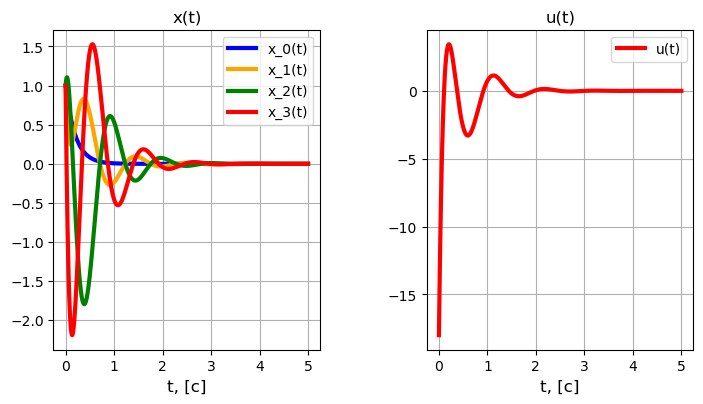

In [850]:
modeling(A, B, K,time_end=5)

# Task2

In [851]:
A = np.array([
    [0, 7, 0, 0],
    [-7, 0, 0, 0],
    [0, 0, 0, 2],
    [0, 0, -2, 0],
])
C = np.array([
    [1, 0, 0, 6]
])

In [852]:
np.linalg.eig(A)[0]

array([0.+7.j, 0.-7.j, 0.+2.j, 0.-2.j])

In [853]:
CToolbox.check_eigenvalues_observable(A, C)

array([ True,  True,  True,  True])

In [854]:
desired_eigvalues = [-5, -5, -5, -5]
G = task1_get_G(desired_eigvalues)
Y = np.array([
    [1],
    [1],
    [1],
    [1]
])
G, Y

(array([[-5,  1,  0,  0],
        [ 0, -5,  1,  0],
        [ 0,  0, -5,  1],
        [ 0,  0,  0, -5]]),
 array([[1],
        [1],
        [1],
        [1]]))

In [855]:
CToolbox.check_system_controllable(G, Y)

True

In [856]:
L = task2_get_L(A, C, G, Y)
L

Optimization error: 8.936314941956774e-31, rankP = 4


array([[-10.67],
       [-13.73],
       [  0.08],
       [ -1.56]])

In [857]:
def task2_simulate(A, C, L, x0, xh0, ts):
    ss_orig = control.ss(A, np.zeros((A.shape[0], 1)), C, np.zeros((C.shape[0], 1)))
    original_resp = control.forced_response(ss_orig, X0=x0, T=ts)
    ss = control.ss(A + L@C, L, A*0, L*0)
    return original_resp, control.forced_response(ss, X0=xh0, T=ts, U=original_resp.outputs.reshape(-1))